In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from pymongo import MongoClient
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np


requests allows you to send HTTP requests to a web server which returns a Response Object with all the response data (i.e. HTML).


beautifulsoup (bs4) is used to pull data out of HTML files and convert the data to a BeautifulSoup object, which represents the HTML as a nested data structur

In [ ]:
s_reviewlist = []
s_page = requests.get('https://www.consumeraffairs.com/food/subway.html')
s_soup = BeautifulSoup(s_page.content, 'html.parser')

Extracting the HTML of the web page  and creating a BeautifulSoup object

2- Find and Extract the Data Elements



In [ ]:
def sget_reviews(soup):
    reviews = soup.find_all('div', class_ = 'rvw js-rvw')
    for item in reviews:
        review = {
        'reviewer': item.find('strong', class_ = 'rvw-aut__inf-nm').text.strip(),
        'date': item.find('span', class_ = 'ca-txt-cpt').text.strip(),
        'body': item.find('p').text.strip(),
        }
        s_reviewlist.append(review)

For each of the data elements we want to extract, we will find all the HTML lines that are within a specific tag and class. We will then extract the data elements and store the data in a list
All the elements mentioned above are within the class name rvw js-rvw
Which is divided into subclasses or subdives for the name rvw-aut__inf-
,date ca-txt-cpt', body'  p


In [ ]:
for x in range(1,12):
    fetch = s_soup(f'consumeraffairs.com/food/subway.html?#sort=helpful&filter=none')
    print(f'Getting page: {x}')
    sget_reviews(s_soup)
print(s_reviewlist)

Getting page: 1
Getting page: 2
Getting page: 3
Getting page: 4
Getting page: 5
Getting page: 6
Getting page: 7
Getting page: 8
Getting page: 9
Getting page: 10
Getting page: 11
[{'reviewer': 'Cheryl of Dallas, TX', 'date': 'Original review: Dec. 27, 2022', 'body': "App does not work. Customer service non-existent. Extremely rude, gossipy staff. They have my money loaded on an app that does not work in the stores and I am unable to use it. Each time I go to a Subway store I leave extremely upset. I either cannot pay for the sandwich because of the app or the staff have verbally spit all over my transaction. I tried calling their corporate office and the women who answered was no better. Extremely rude implying the app didn't work because of me. Unhelpful and resistant. Their new sandwich menu isn't that great...more like an excuse to charge more. All in all, Subway which used to be an affordable and favorite restaurant, has now become a huge disappointment."}, {'reviewer': 'frank of Fo

In [ ]:
sub_df = pd.DataFrame(s_reviewlist)
sub_df.shape

(110, 3)

In [ ]:
sub_df.head()


,reviewer,date,body
0,"Cheryl of Dallas, TX","Original review: Dec. 27, 2022",App does not work. Customer service non-existe...
1,"frank of Fort Lauderdale, FL","Original review: Dec. 20, 2022",The Subway service has changed for the worse o...
2,"E. of Missouri City, TX","Original review: Dec. 17, 2022",Customer service and food preparation. Horribl...
3,"Daniel of Morrison, CO","Original review: Dec. 17, 2022",I will preface my poor review by saying I have...
4,"Anne of Sophia, NC","Original review: Dec. 16, 2022",Have all Subway restaurants got stingy or just...


In [ ]:
sub_df['date'] = sub_df['date'].apply(lambda x: x.replace('Original review: ', ''))
sub_df['location'] = sub_df.reviewer.apply(lambda x: x.split(' of')[-1])
sub_df['state'] = sub_df.location.apply(lambda x: x.split(', ')[-1])
sub_df['location'] = sub_df.location.apply(lambda x: x.split(', ')[0])
sub_df['reviewer'] = sub_df['reviewer'].apply(lambda x: x.split(' of')[0])
sub_df['year'] = sub_df.date.apply(lambda x: x.split(', ')[-1])
sub_df['date'] = sub_df['date'].apply(lambda x: x.split(', ')[0])
sub_df['month'] = sub_df.date.apply(lambda x: x.split(' ')[0])
sub_df['fast food outlet'] = 'Subway'
sub_df.head()

,reviewer,date,body,location,state,year,month,fast food outlet
0,Cheryl,Dec. 27,App does not work. Customer service non-existe...,Dallas,TX,2022,Dec.,Subway
1,frank,Dec. 20,The Subway service has changed for the worse o...,Fort Lauderdale,FL,2022,Dec.,Subway
2,E.,Dec. 17,Customer service and food preparation. Horribl...,Missouri City,TX,2022,Dec.,Subway
3,Daniel,Dec. 17,I will preface my poor review by saying I have...,Morrison,CO,2022,Dec.,Subway
4,Anne,Dec. 16,Have all Subway restaurants got stingy or just...,Sophia,NC,2022,Dec.,Subway


MCDO

In [ ]:
m_reviewlist = []
m_page = requests.get('https://www.consumeraffairs.com/food/mcd.html')
m_soup = BeautifulSoup(m_page.content, 'html.parser')
def mget_reviews(soup):
    reviews = soup.find_all('div', class_ = 'rvw js-rvw')
    for item in reviews:
        review = {
        'reviewer': item.find('strong', class_ = 'rvw-aut__inf-nm').text.strip(),
        'date': item.find('span', class_ = 'ca-txt-cpt').text.strip(),
        'body': item.find('p').text.strip(),
        }
        m_reviewlist.append(review)   
for y in range(1,12):
    fetch = m_soup(f'https://www.consumeraffairs.com/food/mcd.html?page={y}#sort=top_reviews&filter=none')
    print(f'Getting page: {y}')
    mget_reviews(m_soup)
print(m_reviewlist)


Getting page: 1
Getting page: 2
Getting page: 3
Getting page: 4
Getting page: 5
Getting page: 6
Getting page: 7
Getting page: 8
Getting page: 9
Getting page: 10
Getting page: 11
[{'reviewer': 'Jay of Brooklyn, CT', 'date': 'Original review: Jan. 12, 2023', 'body': 'I stopped in McDonalds yesterday wanting 3 fresh hash browns and a large ice coffee reg. I waited over 5 minutes for someone to come to the register. I had to say, "Is anyone working here?" A woman appeared and I told her I wanted 3 fresh hash browns as the ones sitting under the heat lamp I known have been sitting for a while. The employee dropped 3 hash browns in the fryer and walked away never to be seen again. Another woman appeared and took three old hash browns and tried to give it to me, I explained I ordered fresh hash browns. She gave me three fresh hash browns and walked away. This morning I entered the same establishment and used a stop watch to see how long before anyone noticed me. Five minutes and 40 seconds it

In [ ]:
mc_df = pd.DataFrame(m_reviewlist)
print (mc_df.shape)
mc_df.head()

(110, 3)


,reviewer,date,body
0,"Jay of Brooklyn, CT","Original review: Jan. 12, 2023",I stopped in McDonalds yesterday wanting 3 fre...
1,"Laura of Canton, OH","Original review: Dec. 10, 2022","I placed the order on the app, put in my custo..."
2,"bethany of Louisville, KY","Original review: Dec. 9, 2022",I went to the Mcdonald's on Dixie Highway in L...
3,"Matthew of Surprise, AZ","Original review: Nov. 26, 2022",11/23/22. Went to the McDonalds on Greenway & ...
4,"Alan of Pittsburgh, PA","Original review: Nov. 21, 2022","Shake machine always down, terrible service, a..."


In [ ]:
mc_df['date'] = mc_df['date'].apply(lambda x: x.replace('Original review: ', ''))
mc_df['location'] = mc_df.reviewer.apply(lambda x: x.split(' of')[-1])
mc_df['state'] = mc_df.location.apply(lambda x: x.split(', ')[-1])
mc_df['location'] = mc_df.location.apply(lambda x: x.split(', ')[0])
mc_df['reviewer'] = mc_df['reviewer'].apply(lambda x: x.split(' of')[0])
mc_df['year'] = mc_df.date.apply(lambda x: x.split(', ')[-1])
mc_df['date'] = mc_df['date'].apply(lambda x: x.split(', ')[0])
mc_df['month'] = mc_df.date.apply(lambda x: x.split(' ')[0])
mc_df['fast food outlet'] = 'McDonalds'
mc_df.head()

,reviewer,date,body,location,state,year,month,fast food outlet
0,Jay,Jan. 12,I stopped in McDonalds yesterday wanting 3 fre...,Brooklyn,CT,2023,Jan.,McDonalds
1,Laura,Dec. 10,"I placed the order on the app, put in my custo...",Canton,OH,2022,Dec.,McDonalds
2,bethany,Dec. 9,I went to the Mcdonald's on Dixie Highway in L...,Louisville,KY,2022,Dec.,McDonalds
3,Matthew,Nov. 26,11/23/22. Went to the McDonalds on Greenway & ...,Surprise,AZ,2022,Nov.,McDonalds
4,Alan,Nov. 21,"Shake machine always down, terrible service, a...",Pittsburgh,PA,2022,Nov.,McDonalds


Burger king

In [ ]:
b_reviewlist = []
b_page = requests.get('https://www.consumeraffairs.com/food/burgerking.html')
b_soup = BeautifulSoup(b_page.content, 'html.parser')
def bget_reviews(soup):
    reviews = soup.find_all('div', class_ = 'rvw js-rvw')
    for item in reviews:
        review = {
        'reviewer': item.find('strong', class_ = 'rvw-aut__inf-nm').text.strip(),
        'date': item.find('span', class_ = 'ca-txt-cpt').text.strip(),
        'body': item.find('p').text.strip(),
        }
        b_reviewlist.append(review)   
for z in range(1,12):
    fetch = b_soup(f'https://www.consumeraffairs.com/food/burgerking.html?page={z}#sort=recent&filter=none')
    print(f'Getting page: {z}')
    bget_reviews(b_soup)
    #print(b_reviewlist)

Getting page: 1
Getting page: 2
Getting page: 3
Getting page: 4
Getting page: 5
Getting page: 6
Getting page: 7
Getting page: 8
Getting page: 9
Getting page: 10
Getting page: 11


In [ ]:
bk_df = pd.DataFrame(b_reviewlist)
bk_df.shape
bk_df.head()
bk_df['date'] = bk_df['date'].apply(lambda x: x.replace('Original review: ', ''))
bk_df['location'] = bk_df.reviewer.apply(lambda x: x.split(' of')[-1])
bk_df['state'] = bk_df.location.apply(lambda x: x.split(', ')[-1])
bk_df['location'] = bk_df.location.apply(lambda x: x.split(', ')[0])
bk_df['reviewer'] = bk_df['reviewer'].apply(lambda x: x.split(' of')[0])
bk_df['year'] = bk_df.date.apply(lambda x: x.split(', ')[-1])
bk_df['date'] = bk_df['date'].apply(lambda x: x.split(', ')[0])
bk_df['month'] = bk_df.date.apply(lambda x: x.split(' ')[0])
bk_df['fast food outlet'] = 'Burger King'
bk_df.head()
bk_df.shape


(110, 8)

merging the 3 datasets

In [ ]:
df = pd.concat([sub_df, mc_df, bk_df],ignore_index=True)
df.head()

,reviewer,date,body,location,state,year,month,fast food outlet
0,Cheryl,Dec. 27,App does not work. Customer service non-existe...,Dallas,TX,2022,Dec.,Subway
1,frank,Dec. 20,The Subway service has changed for the worse o...,Fort Lauderdale,FL,2022,Dec.,Subway
2,E.,Dec. 17,Customer service and food preparation. Horribl...,Missouri City,TX,2022,Dec.,Subway
3,Daniel,Dec. 17,I will preface my poor review by saying I have...,Morrison,CO,2022,Dec.,Subway
4,Anne,Dec. 16,Have all Subway restaurants got stingy or just...,Sophia,NC,2022,Dec.,Subway


The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.
Fortenaly python has a list of stop words in every language 
all we have to do is import the necessary libraries and use the desired funcion 

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2-Data Cleaning**

In [ ]:
#remove punctuation marks from 'body' column
df['body'] = df['body'].str.replace('[^\w\s]', '')

#set all content to lower-case
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove all stop-words
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# extracting non alphaneumeric weird characters
weird_chars = []
raw_review = df.loc[:,["body"]] ## Gives the list of all reviews
raw_review = raw_review["body"]
for char in raw_review:
    weird_chars += re.findall(r"[^a-zA-Z0-9\s\w\.]", char.lower())
weird_char_list = list(set(weird_chars))
print(weird_char_list) 
"".join(weird_char_list)
df['body'] = [re.sub(r"[Î¾î\'\\\%!\$\&\'()\*\+,\-\.\/:;<=>?@\[\]^_`{|}~]", "", item).lower() for item in df["body"]]
df["body"].head() ## This does not have anymore any weird char



[]


<ipython-input-15-b05fa824c376>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace('[^\w\s]', '')


0    app work customer service nonexistent extremel...
1    subway service changed worse last 15yrs one ta...
2    customer service food preparation horrible cus...
3    preface poor review saying eaten thousands sub...
4    subway restaurants got stingy national highway...
Name: body, dtype: object

**3-Extracting columns of interest**




In [ ]:
raw_review = df.loc[:,["body"]] ## Gives the list of all reviews
raw_review = raw_review["body"]
df_selected = pd.DataFrame(raw_review)
print(df_selected.head())


                                                body
0  app work customer service nonexistent extremel...
1  subway service changed worse last 15yrs one ta...
2  customer service food preparation horrible cus...
3  preface poor review saying eaten thousands sub...
4  subway restaurants got stingy national highway...


**4-Sentiment analsys**

**Polarity *italicized text* and subjectivity with TextBlob** 

here we are going to classify each review to be negative, positive or neutural based on the subjectivity and polarity values .
first using TextBlob Then sentiment analyser From Vader and lastly we  call out compound as a separate column


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
MyAnalyzer = SentimentIntensityAnalyzer()
df_selected[['polarity', 'subjectivity']] = df_selected['body'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

df_selected['scores'] = df_selected['body'].apply(lambda body : MyAnalyzer.polarity_scores(body))
df_selected['compound']  = df_selected['scores'].apply(lambda score_dict: score_dict['compound'])
#add columns 'sentiment' and 'terms'
df_selected['sentiment'] = df_selected['compound'].apply(lambda s: 'neutral' if 0<s<0.2 else 'positive' if s>0.2 else 'negative')

df_selected['terms'] = df_selected['body'].apply(lambda lst: lst.split(' '))

df_selected


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,body,polarity,subjectivity,scores,compound,sentiment,terms
0,app work customer service nonexistent extremel...,-0.030785,0.545868,"{'neg': 0.247, 'neu': 0.634, 'pos': 0.118, 'co...",-0.8553,negative,"[app, work, customer, service, nonexistent, ex..."
1,subway service changed worse last 15yrs one ta...,0.080000,0.303333,"{'neg': 0.253, 'neu': 0.625, 'pos': 0.122, 'co...",-0.5267,negative,"[subway, service, changed, worse, last, 15yrs,..."
2,customer service food preparation horrible cus...,-0.340000,0.465000,"{'neg': 0.342, 'neu': 0.605, 'pos': 0.053, 'co...",-0.8883,negative,"[customer, service, food, preparation, horribl..."
3,preface poor review saying eaten thousands sub...,0.054545,0.354545,"{'neg': 0.136, 'neu': 0.752, 'pos': 0.113, 'co...",-0.4703,negative,"[preface, poor, review, saying, eaten, thousan..."
4,subway restaurants got stingy national highway...,-0.039989,0.392857,"{'neg': 0.191, 'neu': 0.723, 'pos': 0.086, 'co...",-0.7814,negative,"[subway, restaurants, got, stingy, national, h..."
...,...,...,...,...,...,...,...
325,bk sandwiches always delicious comfort food ch...,-0.133333,0.752778,"{'neg': 0.112, 'neu': 0.488, 'pos': 0.4, 'comp...",0.9403,positive,"[bk, sandwiches, always, delicious, comfort, f..."
326,staff rude behavior denying clean table neglec...,0.055556,0.533333,"{'neg': 0.421, 'neu': 0.388, 'pos': 0.191, 'co...",-0.7269,negative,"[staff, rude, behavior, denying, clean, table,..."
327,ordered double whopper onions mayo instead get...,0.042857,0.114286,"{'neg': 0.06, 'neu': 0.849, 'pos': 0.091, 'com...",0.2500,positive,"[ordered, double, whopper, onions, mayo, inste..."
328,walked burger king order whopper fries coke ki...,-0.454545,0.818182,"{'neg': 0.162, 'neu': 0.764, 'pos': 0.074, 'co...",-0.5859,negative,"[walked, burger, king, order, whopper, fries, ..."



1.   List item
2.   List item



**visualising Sentiments** 

          Total  Percentage
negative    176       53.33
positive    143       43.33
neutral      11        3.33


Text(0.5, 1.0, 'Reviews analsys')

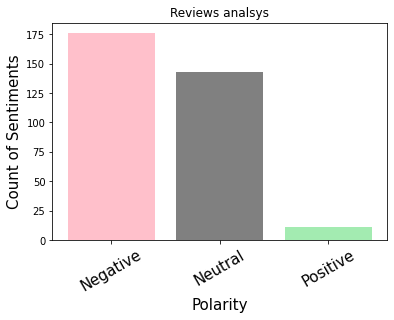

In [ ]:
#Function for calculating the values

def count_values(dataframe,feature):
 total=dataframe.loc[:,feature].value_counts(dropna=False)
 percentage=round(dataframe.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])



value_count=count_values(df_selected,'sentiment')
print(value_count)
labels = ['Negative', 'Neutral', 'Positive']
index = np.arange(len(labels))
plt.bar(index,value_count['Total'],color=['pink','gray','#A3EBB1'])
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Reviews analsys')


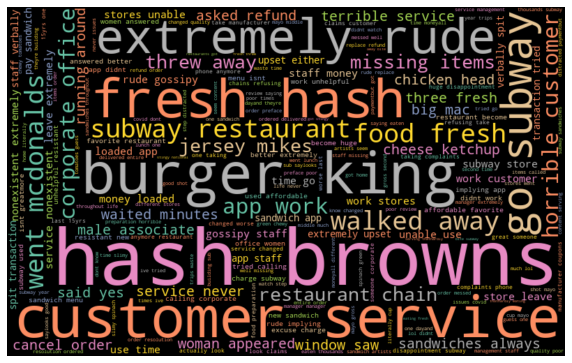

In [ ]:
from wordcloud import WordCloud 
all_words = ' '.join([text for text in df_selected['body']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Set2').generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Visualization for each fast food**

Text(0.5, 1.0, 'Reviews analysis for subway')

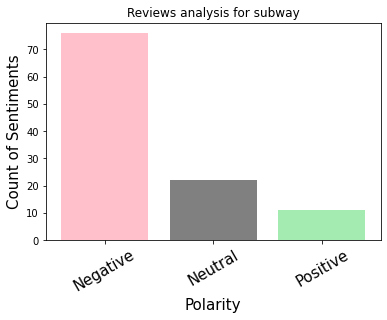

In [ ]:
df_subway = df_selected.iloc[:109,:]
#print(df_subway.head())
df_macdo= df_selected.iloc[109:219,:]
#print(df_macdo.head())
df_burking = df_selected.iloc[219:329,:]
#print(df_burking.head())
value_count=count_values(df_subway,'sentiment')
plt.bar(index,value_count['Total'],color=['pink','gray','#A3EBB1'])
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Reviews analysis for subway')




Text(0.5, 1.0, 'Reviews analysis for macdo')

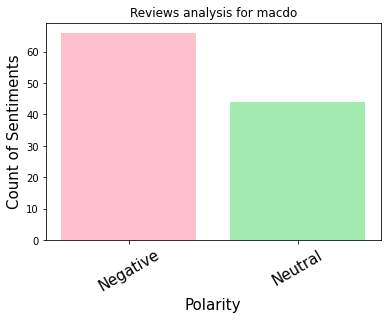

In [ ]:
value_count=count_values(df_macdo,'sentiment')
index = np.arange(2)
plt.bar(index,value_count['Total'],color=['pink','#A3EBB1'])
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Reviews analysis for macdo')

Text(0.5, 1.0, 'Reviews analysis for burgerking')

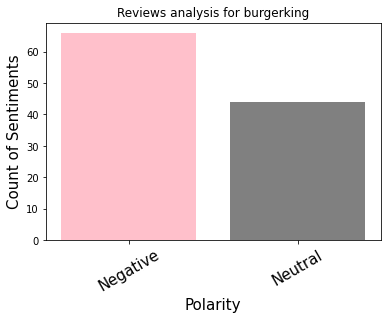

In [ ]:
value_count=count_values(df_macdo,'sentiment')
index = np.arange(2)
plt.bar(index,value_count['Total'],color=['pink','gray'])
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Reviews analysis for burgerking')

**Computing common words**

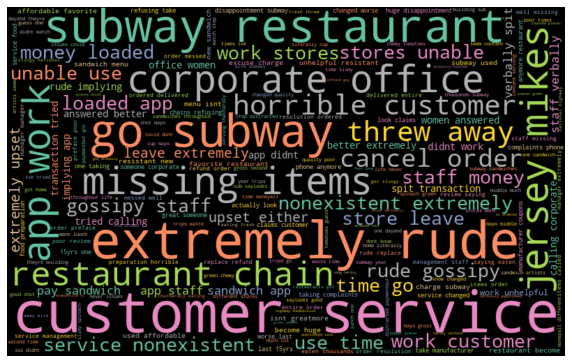

In [ ]:
from wordcloud import WordCloud 
all_words = ' '.join([text for text in df_subway['body']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Set2').generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

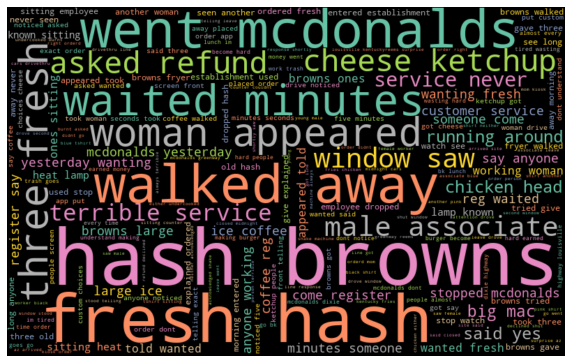

In [ ]:
all_words = ' '.join([text for text in df_macdo['body']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Set2').generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

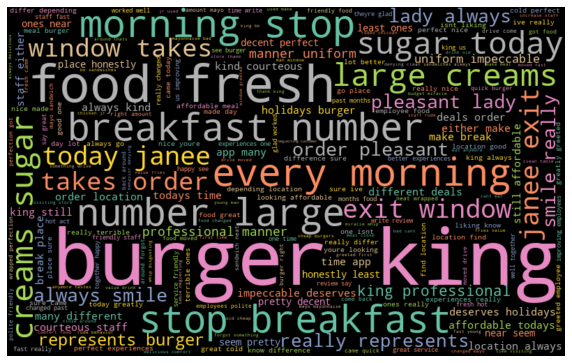

In [ ]:
all_words = ' '.join([text for text in df_burking['body']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Set2').generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()